In [ ]:
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU , Bidirectional , Dropout
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import load_model

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/test.csv')

In [ ]:
train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_texts = train['text']
train_labels = train['target']

In [ ]:
train_text, valid_text , train_label , valid_label = train_test_split(train_texts,train_labels,test_size=0.2,random_state=42)

In [ ]:
vectorizer = CountVectorizer()
train_text = vectorizer.fit_transform(train_text).todense()
print( vectorizer.vocabulary_ )
valid_text = vectorizer.transform(valid_text).todense()

{'courageous': 4224, 'and': 1653, 'honest': 7922, 'analysis': 1643, 'of': 11752, 'need': 11286, 'to': 16333, 'use': 17031, 'atomic': 2008, 'bomb': 2792, 'in': 8384, '1945': 212, 'hiroshima70': 7830, 'japanese': 8815, 'military': 10700, 'refused': 13565, 'surrender': 15666, 'https': 8026, 'co': 3863, 'vhmtytptgr': 17226, 'zachzaidman': 18381, '670thescore': 773, 'wld': 17804, 'shame': 14605, 'if': 8242, 'that': 16064, 'golf': 7178, 'cart': 3372, 'became': 2411, 'engulfed': 5776, 'flames': 6455, 'boycottbears': 2866, 'tell': 15965, 'barackobama': 2277, 'rescind': 13689, 'medals': 10512, 'honor': 7926, 'given': 7093, 'us': 17015, 'soldiers': 15051, 'at': 1986, 'the': 16072, 'massacre': 10405, 'wounded': 17898, 'knee': 9394, 'sign': 14756, 'now': 11553, 'amp': 1630, 'rt': 14063, 'u4r8driuac': 16770, 'worried': 17883, 'about': 1204, 'how': 7991, 'ca': 3184, 'drought': 5323, 'might': 10679, 'affect': 1365, 'you': 18285, 'extreme': 6086, 'weather': 17573, 'does': 5167, 'it': 8687, 'dampen': 4

In [ ]:
print(train_text.shape , valid_text.shape )
print(train_label.shape , valid_label.shape)


(6090, 18566) (1523, 18566)
(6090,) (1523,)


In [ ]:
test_text = test['text']

In [ ]:
np.unique(train_label)

array([0, 1])

In [ ]:
print(train_text.shape , valid_text.shape )
print(train_label.shape , valid_label.shape)

(6090, 18566) (1523, 18566)
(6090,) (1523,)


In [ ]:


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(18566,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_text,
                    train_label,
                    epochs=20,
                    batch_size=512,
                    validation_data=(valid_text, valid_label))

Epoch 1/20
12/12 [==============================] - 3s 105ms/step - loss: 0.6632 - accuracy: 0.7084 - val_loss: 0.6254 - val_accuracy: 0.7682
Epoch 2/20
12/12 [==============================] - 1s 91ms/step - loss: 0.5766 - accuracy: 0.8222 - val_loss: 0.5729 - val_accuracy: 0.7938
Epoch 3/20
12/12 [==============================] - 1s 91ms/step - loss: 0.4989 - accuracy: 0.8598 - val_loss: 0.5330 - val_accuracy: 0.8011
Epoch 4/20
12/12 [==============================] - 1s 91ms/step - loss: 0.4296 - accuracy: 0.8874 - val_loss: 0.5027 - val_accuracy: 0.8089
Epoch 5/20
12/12 [==============================] - 1s 90ms/step - loss: 0.3687 - accuracy: 0.9034 - val_loss: 0.4813 - val_accuracy: 0.8102
Epoch 6/20
12/12 [==============================] - 1s 98ms/step - loss: 0.3161 - accuracy: 0.9156 - val_loss: 0.4678 - val_accuracy: 0.8162
Epoch 7/20
12/12 [==============================] - 2s 138ms/step - loss: 0.2710 - accuracy: 0.9296 - val_loss: 0.4599 - val_accuracy: 0.8142
Epoch 8/20


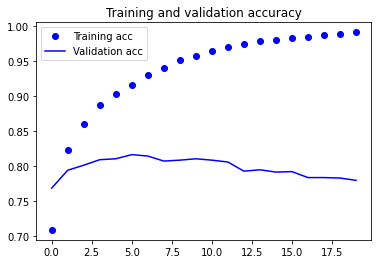

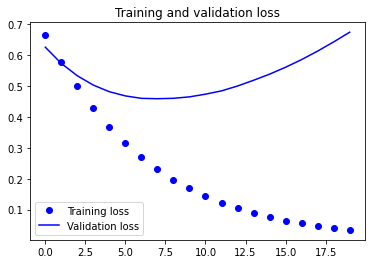

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Preprocessing Manual

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/test.csv')
train_texts = train['text']
train_labels = train['target']
train_text, valid_text , train_label , valid_label = train_test_split(train_texts,train_labels,test_size=0.2,random_state=42)


In [ ]:
train_texts[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
len(train_texts)

7613

#### A)using Splitting

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def splitting(train_texts):  
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  tweets = []
  for i in range(len(train_texts)):
    s = train_texts[i].lower()
    stripped = [re_punc.sub('', w) for w in s.split() ]
    tweets.append(stripped)
  return tweets

In [ ]:
split_tweets = splitting(train_texts)

In [ ]:
print(len(split_tweets))
print(split_tweets[0])

7613
['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']


#### - split & remove stop words

In [ ]:
def splitting_stop_words(train_texts):  
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  tweets = []
  for i in range(len(train_texts)):
    s = train_texts[i].lower()
 
    # words = [w for w in s.split() if w not in stop_words]
    stripped = [re_punc.sub('', w) for w in s.split() if w not in stop_words]
    tweets.append(stripped)
  return tweets

In [ ]:
tweets = splitting_stop_words(train_texts)

In [ ]:
print(len(tweets))
print(tweets[0])

7613
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']


#### B) using Tokenizer

In [ ]:
def token(train_texts):  
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  tokens = []
  for i in range(len(train_texts)):
    s = train_texts[i].lower()
    token = nltk.tokenize.sent_tokenize(s)
    tokens.append(token)
  return tokens

In [ ]:
tokens = token(train_texts)

In [ ]:
print(len(tokens))
print(tokens[0])

7613
['our deeds are the reason of this #earthquake may allah forgive us all']


In [ ]:
word_tokens = []
for i in range(len(train_texts)):
  word_tokens.append( word_tokenize(train_texts[i].lower()) )

In [ ]:
print(len(word_tokens))
print(word_tokens[0])

7613
['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', '#', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']


## clean tweets Manual

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]


def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    words = stem_words(words)
    return ' '.join(words)


In [ ]:
def normalize_corpus(train_texts):
  return [normalize_text(t) for t in train_texts]

clean_train_texts = normalize_corpus(train_texts)

In [ ]:
clean_train_texts[0]

'deed reason earthquak may allah forgiv us'

In [ ]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(clean_train_texts)
bow = tok.texts_to_matrix(clean_train_texts[:10], mode='count')
bow.shape

(10, 18599)

----

# Bag Of Words

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/test.csv')
train_texts = train['text']
train_labels = train['target']
test_texts = test['text']
train_text, valid_text , train_label , valid_label = train_test_split(train_texts,train_labels,test_size=0.2,random_state=42)


In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(clean_train_texts)

# Extract binary BoW features
x_train = tok.texts_to_matrix(train_text, mode='binary')
x_valid = tok.texts_to_matrix(valid_text, mode='binary')

In [ ]:
x_train[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_label).astype('float32')
y_valid = np.asarray(valid_label).astype('float32')

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(6090, 10000)
(6090,)
(1523, 10000)
(1523,)


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 16)                160016    
                                                                 
 dense_35 (Dense)            (None, 16)                272       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,batch_size=512,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
12/12 [==============================] - 1s 48ms/step - loss: 0.6722 - accuracy: 0.5696 - val_loss: 0.6515 - val_accuracy: 0.5739
Epoch 2/20
12/12 [==============================] - 0s 33ms/step - loss: 0.6283 - accuracy: 0.5823 - val_loss: 0.6249 - val_accuracy: 0.6238
Epoch 3/20
12/12 [==============================] - 0s 33ms/step - loss: 0.5955 - accuracy: 0.6872 - val_loss: 0.6069 - val_accuracy: 0.7019
Epoch 4/20
12/12 [==============================] - 0s 33ms/step - loss: 0.5678 - accuracy: 0.7437 - val_loss: 0.5924 - val_accuracy: 0.7354
Epoch 5/20
12/12 [==============================] - 0s 35ms/step - loss: 0.5426 - accuracy: 0.7770 - val_loss: 0.5812 - val_accuracy: 0.7505
Epoch 6/20
12/12 [==============================] - 0s 33ms/step - loss: 0.5186 - accuracy: 0.8013 - val_loss: 0.5712 - val_accuracy: 0.7617
Epoch 7/20
12/12 [==============================] - 0s 33ms/step - loss: 0.4938 - accuracy: 0.8236 - val_loss: 0.5593 - val_accuracy: 0.7643
Epoch 8/20
12

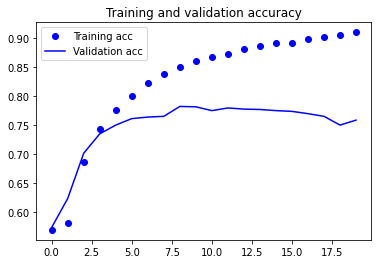

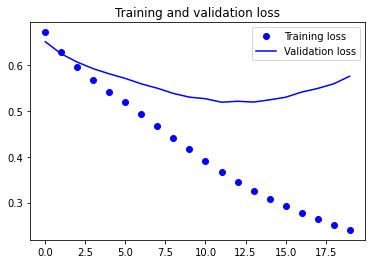

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

----

# LSTM

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep learning/nlp/test.csv')
train_texts = train['text']
train_labels = train['target']
test_texts = test['text']
train_text, valid_text , train_label , valid_label = train_test_split(train_texts,train_labels,test_size=0.2,random_state=42)


In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(train_text)

# Extract binary BoW features
train_text = tok.texts_to_matrix(train_text, mode='binary')
valid_text = tok.texts_to_matrix(valid_text, mode='binary')

In [ ]:
embedding_vecor_length = 32
top_words = 1000
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=10000))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10000, 32)         32000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_text, train_label, validation_data=(valid_text, valid_label), epochs=3, batch_size=64)

Epoch 1/3
96/96 [==============================] - 1591s 17s/step - loss: 0.6845 - accuracy: 0.5678 - val_loss: 0.6847 - val_accuracy: 0.5739
Epoch 2/3
96/96 [==============================] - 1726s 18s/step - loss: 0.6841 - accuracy: 0.5695 - val_loss: 0.6822 - val_accuracy: 0.5739
Epoch 3/3
96/96 [==============================] - 1568s 16s/step - loss: 0.6842 - accuracy: 0.5695 - val_loss: 0.6824 - val_accuracy: 0.5739


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/LSTM.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/LSTM.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10000, 32)         32000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
_________________________________________________________________


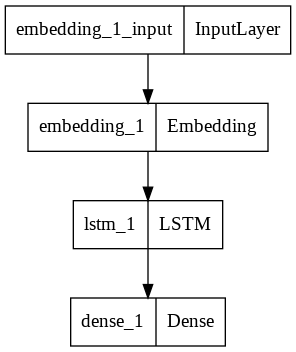

In [ ]:
plot_model(model)

----

# GRU

In [ ]:

model_GRU = Sequential()
model_GRU.add(Embedding(top_words, embedding_vecor_length, input_length=10000))
model_GRU.add(GRU(32))
model_GRU.add(Flatten())
model_GRU.add(Dense(1,activation='sigmoid'))


In [ ]:
model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#GRU
model_GRU.fit(train_text, train_label, validation_data=(valid_text, valid_label), epochs=3, batch_size=64)

Epoch 1/3
96/96 [==============================] - 1256s 13s/step - loss: 0.6847 - accuracy: 0.5695 - val_loss: 0.6823 - val_accuracy: 0.5739
Epoch 2/3
96/96 [==============================] - 1204s 13s/step - loss: 0.6837 - accuracy: 0.5695 - val_loss: 0.6824 - val_accuracy: 0.5739
Epoch 3/3
96/96 [==============================] - 1167s 12s/step - loss: 0.6838 - accuracy: 0.5695 - val_loss: 0.6823 - val_accuracy: 0.5739


In [ ]:
model_GRU.save('/content/drive/MyDrive/Colab Notebooks/deep learning/GRU.h5')

In [ ]:
model_GRU = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/GRU.h5')
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10000, 32)         32000     
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 38,369
Trainable params: 38,369
Non-trainable params: 0
_________________________________________________________________


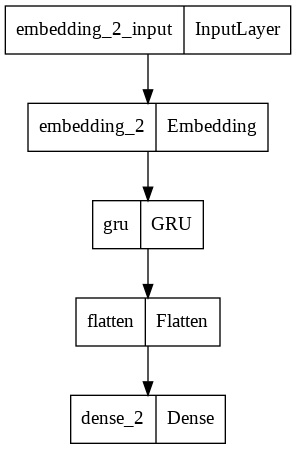

In [ ]:
plot_model(model_GRU)

# Bidirectional

In [ ]:
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(top_words, embedding_vecor_length, input_length=10000))
model_bidirectional.add(Bidirectional(LSTM(64)))
model_bidirectional.add(Dropout(0.5))
model_bidirectional.add(Dense(1, activation='sigmoid'))
model_bidirectional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
#bidirectional
history_bi = model_bidirectional.fit(train_text, train_label, validation_data=(valid_text, valid_label), epochs=3, batch_size=64)

Epoch 1/3
96/96 [==============================] - 2510s 26s/step - loss: 0.6612 - accuracy: 0.6028 - val_loss: 0.6471 - val_accuracy: 0.6408
Epoch 2/3
96/96 [==============================] - 2468s 26s/step - loss: 0.6461 - accuracy: 0.6255 - val_loss: 0.6474 - val_accuracy: 0.6389
Epoch 3/3
96/96 [==============================] - 2479s 26s/step - loss: 0.6457 - accuracy: 0.6258 - val_loss: 0.6461 - val_accuracy: 0.6382


In [ ]:
model_bidirectional.save('/content/drive/MyDrive/Colab Notebooks/deep learning/Bidirectional.h5')

In [ ]:
model_bidirectional = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/Bidirectional.h5')
model_bidirectional.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10000, 32)         32000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 81,793
Trainable params: 81,793
Non-trainable params: 0
_________________________________________________________________


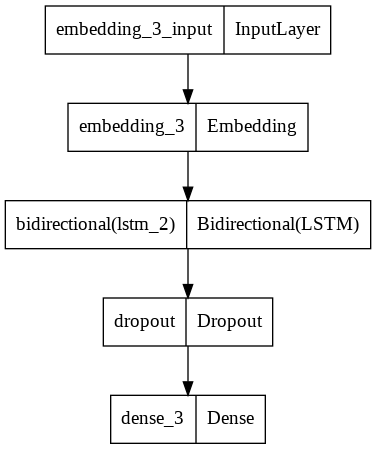

In [ ]:
plot_model(model_bidirectional)

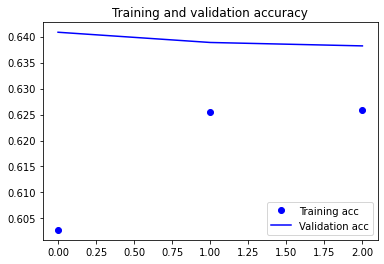

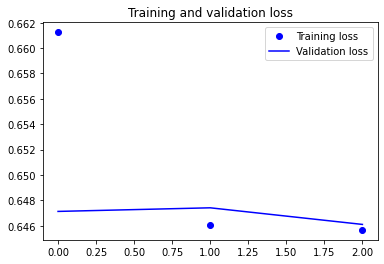

In [ ]:
acc = history_bi.history['accuracy']
val_acc = history_bi.history['val_accuracy']
loss = history_bi.history['loss']
val_loss = history_bi.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()